In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

dates = pd.date_range(start="2024-01-01", end="2024-03-31")

data = {
    "date": np.random.choice(dates, 500),
    "customer_id": np.random.randint(1000, 1100, 500),
    "city": np.random.choice(["Istanbul", "Ankara", "Izmir"], 500),
    "product": np.random.choice(["Laptop", "Mobile", "Tablet"], 500),
    "price": np.random.randint(800, 3000, 500),
    "quantity": np.random.randint(1, 4, 500)
}

df = pd.DataFrame(data)
df["total_sales"] = df["price"] * df["quantity"]

df.head()


,date,customer_id,city,product,price,quantity,total_sales
0,2024-02-21,1042,Izmir,Tablet,2548,1,2548
1,2024-01-15,1043,Istanbul,Mobile,958,1,958
2,2024-03-12,1028,Istanbul,Tablet,2777,1,2777
3,2024-03-01,1012,Izmir,Laptop,1756,2,3512
4,2024-01-21,1011,Istanbul,Tablet,2871,3,8613


In [ ]:
customer_revenue = df.groupby("customer_id")["total_sales"].sum().sort_values(ascending=False)

customer_revenue.head(10)


,total_sales
customer_id,
1073,44560
1016,40561
1091,39903
1060,37004
1004,35681
1074,35531
1011,34399
1094,33490
1055,33474


In [ ]:
customer_orders = df.groupby("customer_id").size().sort_values(ascending=False)

customer_orders.head(10)


,0
customer_id,
1016,10
1091,10
1074,10
1004,9
1025,9
1098,8
1035,8
1073,8
1089,8


In [ ]:
df["average_order_value"] = df["total_sales"]

overall_aov = df["average_order_value"].mean()

overall_aov


np.float64(3779.246)

In [ ]:
customer_summary = df.groupby("customer_id").agg({
    "total_sales": "sum",
    "customer_id": "count"
})

customer_summary.columns = ["total_revenue", "total_orders"]

customer_summary = customer_summary.sort_values(by="total_revenue", ascending=False)

customer_summary.head(10)


,total_revenue,total_orders
customer_id,,
1073,44560,8
1016,40561,10
1091,39903,10
1060,37004,7
1004,35681,9
1074,35531,10
1011,34399,7
1094,33490,8
1055,33474,8


In [ ]:
# تعیین آستانه VIP (بالاتر از میانگین درآمد)
vip_threshold = customer_summary["total_revenue"].mean()

customer_summary["segment"] = np.where(
    customer_summary["total_revenue"] >= vip_threshold,
    "VIP",
    "Regular"
)

customer_summary["segment"].value_counts()


,count
segment,
Regular,52
VIP,48


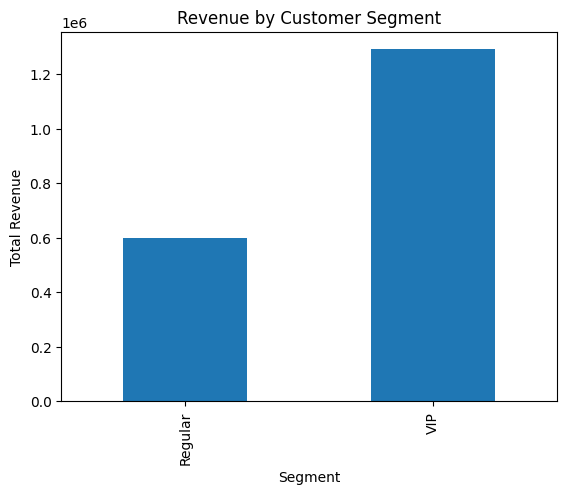

In [ ]:
import matplotlib.pyplot as plt

segment_revenue = customer_summary.groupby("segment")["total_revenue"].sum()

plt.figure()
segment_revenue.plot(kind="bar")
plt.title("Revenue by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Total Revenue")
plt.show()
